In [58]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np

1. Descarga de datos
Descarga los datasets para vinos tintos y blancos desde la siguiente URL: Wine Quality Dataset.
 - Asegúrate de que ambos datasets se encuentren disponibles en tu entorno de trabajo como archivos CSV.
 - Idealmente, intenta llevarlo a cabo de manera programática para no tener que hacer operaciones manualmente.

In [59]:
# URL  datasets - ZIP 
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Descarga archivo ZIP 
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall("wine_quality")  # Extraer zip en la carpeta wine_quality

In [60]:
# Carga archivos csv
df_red = pd.read_csv("wine_quality/winequality-red.csv",sep=";")
df_white = pd.read_csv("wine_quality/winequality-white.csv", sep=";")

In [61]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. Combinar los datos

- Usa Pandas para cargar ambos datasets en dataframes en memoria. - Combina los datos en un único dataframe añadiendo una columna adicional que indique el tipo de vino (`red` o `white`). - ¿Cuántos registros tenemos? ¿Cuántas variables y de qué tipo?

In [63]:
#Añadir columna type_wine
df_red['type_wine']="red"
df_white['type_wine']="white"

In [64]:
#Combinar los dos csv
df_wine = pd.concat([df_red, df_white], ignore_index=True)

In [65]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [66]:
num_registros = df_wine.shape[0]
num_variables = df_wine.shape[1]
tipos_variables = df_wine.dtypes

In [67]:
print(f"Registros: {num_registros}")
print(f"Variables: {num_variables}")

Registros: 6497
Variables: 13


In [68]:
print(f"Tipos de variables:\n{tipos_variables}")

Tipos de variables:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_wine                object
dtype: object


3. Filtrar atípicos y manejar datos ausentes

- Realiza un análisis estadístico o inspección visual de cada columna numérica para identificar valores atípicos. - Usa Pandas para filtrar y eliminar los datos atípicos y los valores ausentes. Explica en tu entrega qué criterios utilizaste para identificar los atípicos.

In [69]:
# Descripción estadística básica
desc_stats = df_wine.describe()

In [70]:
print("Estadísticas Descriptivas:")
print(desc_stats)

Estadísticas Descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000   

In [71]:
#Identificar valores atípicos utilizando IQR
df_wine_numeric = df_wine.select_dtypes(include=['float64', 'int64'])
Q1 = df_wine_numeric.quantile(0.25)
Q3 = df_wine_numeric.quantile(0.75)
IQR = Q3 - Q1

In [72]:
# Calcular los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (df_wine_numeric >= lower_bound) & (df_wine_numeric <= upper_bound)

In [73]:
# Filtrar los valores atípicos
df_wine_filtered = df_wine_numeric[mask.all(axis=1)]

# Eliminar los valores ausentes
df_wine_end = df_wine_filtered.dropna()

In [74]:
# Seleccionar las columnas de texto del DataFrame original
df_wine_text = df_wine.select_dtypes(include=['object', 'string'])

# Combinar el DataFrame filtrado numérico con las columnas de texto
df_final = pd.concat([df_wine_end, df_wine_text], axis=1)
df_final.to_csv('vinos.csv', index=False)

In [75]:
# Ordenar el DataFrame por 'nombre_columna' de manera ascendente
df_ordenado = df_final.sort_values(by='fixed acidity', ascending=True)

# Guardar el DataFrame ordenado en un archivo CSV sin índice
df_ordenado.to_csv('archivo_ordenado.csv', index=False)

In [76]:
print(f"DataFrame después de eliminar valores atípicos: \n\n{df_final.describe()}")

DataFrame después de eliminar valores atípicos: 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4840.000000       4840.000000  4840.000000     4840.000000   
mean        6.973895          0.298889     0.315785        5.558254   
std         0.879274          0.115122     0.101129        4.501241   
min         4.700000          0.080000     0.040000        0.600000   
25%         6.400000          0.220000     0.260000        1.800000   
50%         6.900000          0.280000     0.310000        3.800000   
75%         7.500000          0.350000     0.370000        8.400000   
max         9.600000          0.655000     0.600000       17.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4840.000000          4840.000000           4840.000000  4840.000000   
mean      0.047748            31.840186            124.839050     0.994185   
std       0.016407            15.647792             50.170304     0.002766  

4. Almacenar los datos limpios en SQLite

- Usa SQLite para almacenar el dataframe limpio en una base de datos persistente. - Sigue la documentación oficial de SQLite: [SQLite Python Documentation](https://docs.python.org/3/library/sqlite3.html).

In [77]:
import sqlite3

# Creamos la base de datos SQLite
conn = sqlite3.connect('wines_sqlite.db')

# Guardar el dataframe en una tabla llamada 'vinos'
df_final.to_sql('wines', conn, if_exists='replace', index=False)

print("Datos guardados en la base de datos SQLite.")

# Cerrar la conexión
conn.close()

Datos guardados en la base de datos SQLite.


5. Realizar 3 consultas en SQLite

Basándote en los datos y las columnas del dataset, realiza las siguientes consultas:


In [78]:
# Reconectamos con la base de datos
conn = sqlite3.connect('wines_sqlite.db')


1. Consulta 1: ¿Cuál es el promedio de calidad (`quality`) por tipo de vino (`type`)?

In [79]:
# Consulta 1: Promedio de calidad por tipo
query1 = """
SELECT type_wine, AVG(quality) as avg_quality
FROM wines
GROUP BY type_wine
"""
df_query1 = pd.read_sql_query(query1, conn)
print("Consulta 1 - Promedio de Calidad por Tipo:")
print(df_query1)

Consulta 1 - Promedio de Calidad por Tipo:
  type_wine  avg_quality
0       red     5.656891
1     white     5.848244


2. Consulta 2: ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo?

In [80]:
# Consulta 2: Conteo de vinos con alcohol > 10.5 agrupados por tipo
query2 = """
SELECT type_wine, COUNT(*) as count_alcohol_high
FROM wines
WHERE alcohol > 10.5
GROUP BY type_wine
"""
df_query2 = pd.read_sql_query(query2, conn)
print("\nConsulta 2 - Vinos con Alcohol > 10.5:")
print(df_query2)


Consulta 2 - Vinos con Alcohol > 10.5:
  type_wine  count_alcohol_high
0       red                 257
1     white                1902


3. Consulta 3: Obtén el conteo de vinos por nivel de acidez (`fixed acidity`) agrupados en rangos (por ejemplo, de 0-5, 5-10, 10-15).

In [81]:
# Consulta 3: Conteo de vinos por rango de acidez
query3 = """
WITH ranges AS (
    SELECT '0-5' AS acidity_range
    UNION ALL
    SELECT '5-10'
    UNION ALL
    SELECT '10-15'
    UNION ALL
    SELECT '15+'
)
SELECT 
    r.acidity_range,
    COALESCE(w.count, 0) AS count
FROM ranges r
LEFT JOIN (
    SELECT 
        CASE 
            WHEN [fixed acidity] < 5 THEN '0-5'
            WHEN [fixed acidity] >= 5 AND [fixed acidity] < 10 THEN '5-10'
            WHEN [fixed acidity] >= 10 AND [fixed acidity] < 15 THEN '10-15'
            ELSE '15+'
        END AS acidity_range,
        COUNT(*) AS count
    FROM wines
    GROUP BY acidity_range
) w ON r.acidity_range = w.acidity_range
ORDER BY 
    CASE 
        WHEN r.acidity_range = '15+' THEN 1
        WHEN r.acidity_range = '10-15' THEN 2
        WHEN r.acidity_range = '5-10' THEN 3
        WHEN r.acidity_range = '0-5' THEN 4
    END
"""
df_query3 = pd.read_sql_query(query3, conn)
print("\nConsulta 3 - Conteo por Rango de Acidez:")
print(df_query3)



Consulta 3 - Conteo por Rango de Acidez:
  acidity_range  count
0           15+   1657
1         10-15      0
2          5-10   4826
3           0-5     14


In [82]:
# Cerramos la conexión con la base de datos. 
conn.close()

6. Exportar datos a JSONLines

De cara a una potencial insercion en una base de datos noSQL como `mongoDB`, podemos servirnos de pandas para preparar los datos.

- ¿Qué estructura de datos de python es la más similar a un documento noSQL?




              JSON


- Usa Pandas para transformar los datos de una de las consultas en un archivo JSONLines.

- Usa la librería `jsonlines` para guardar el archivo.


In [83]:
import jsonlines

# Guardar en formato JSONLines
jsonl_file = "wine_quality_avg.jsonl"

with jsonlines.open(jsonl_file, mode='w') as writer:
    for row in df_query1.to_dict(orient="records"):  # Convertir cada fila en un diccionario
        writer.write(row)

- ¿Qué problemas podrían surgir al transformar un dataframe en jsonlines?

* Tipos de datos incompatibles: JSON no admite ciertos tipos de datos de Python
* Valores NaN o None: Sobre todo los NaN, en una bbdd de Mongo dan fallo (mejor que sean null)
* Estructuras anidadas: Pandas convierte listas y diccionarios en strings si no se maneja bien el dato.

- Añade una columna que sea originalmente un `np.array`,¿qué sucede al transformarlo en jsonlines?

In [84]:
# Agregar una columna con un np.array
df_query1["vector"] = [np.array([1, 2, 3]), np.array([4, 5, 6])]

# Intentar guardar directamente en JSONLines
jsonl_file_vector = "df_query1_vector.jsonl"
try:
    with jsonlines.open(jsonl_file_vector, mode='w') as writer:
        for row in df_query1.to_dict(orient="records"):
            writer.write(row)
    print(f"Archivo guardado: {jsonl_file_vector}")
except Exception as e:
    print(f"Error al guardar: {e}")

Error al guardar: Object of type ndarray is not JSON serializable


- Añade una columna que sea originalmente un `pd.datetime`,¿qué sucede al transformarlo en jsonlines?

In [85]:
# Agregar una columna con timestamps
df_query1["timestamp"] = pd.to_datetime(["2025-02-14", "2025-02-15"])

# Intentar guardar directamente en JSONLines
jsonl_file_timestamp = "df_query1_timestamp.jsonl"
try:
    with jsonlines.open(jsonl_file_timestamp, mode='w') as writer:
        for row in df_query1.to_dict(orient="records"):
            writer.write(row)
    print(f"Archivo guardado: {jsonl_file_timestamp}")
except Exception as e:
    print(f"Error al guardar: {e}")

# Solucionamos el problema convirtiendo `datetime` en string
df_query1["timestamp"] = df_query1["timestamp"].astype(str)

Error al guardar: Object of type ndarray is not JSON serializable


7. Análisis de calidad de los vinos

- Inspecciona qué caracteriza a los vinos tintos y blancos con mayor calidad (`quality`).

- Usa análisis estadístico, gráficos o cualquier técnica que consideres relevante para identificar patrones.

In [86]:
df = pd.read_csv('vinos.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4840 non-null   float64
 1   volatile acidity      4840 non-null   float64
 2   citric acid           4840 non-null   float64
 3   residual sugar        4840 non-null   float64
 4   chlorides             4840 non-null   float64
 5   free sulfur dioxide   4840 non-null   float64
 6   total sulfur dioxide  4840 non-null   float64
 7   density               4840 non-null   float64
 8   pH                    4840 non-null   float64
 9   sulphates             4840 non-null   float64
 10  alcohol               4840 non-null   float64
 11  quality               4840 non-null   float64
 12  type_wine             6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 660.0+ KB


In [88]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000
mean,6.973895,0.298889,0.315785,5.558254,0.047748,31.840186,124.839050,0.994185,3.210128,0.505802,10.531425,5.821281
std,0.879274,0.115122,0.101129,4.501241,0.016407,15.647792,50.170304,0.002766,0.148046,0.115638,1.173864,0.765338
min,4.700000,0.080000,0.040000,0.600000,0.009000,2.000000,6.000000,0.987110,2.800000,0.220000,8.400000,4.000000
25%,6.400000,0.220000,0.260000,1.800000,0.036000,20.000000,94.000000,0.991920,3.110000,0.420000,9.500000,5.000000
50%,6.900000,0.280000,0.310000,3.800000,0.045000,30.000000,125.000000,0.994200,3.200000,0.490000,10.400000,6.000000
75%,7.500000,0.350000,0.370000,8.400000,0.054000,42.000000,159.000000,0.996322,3.310000,0.580000,11.300000,6.000000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,3.630000,0.850000,14.000000,7.000000


C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\2341643848.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


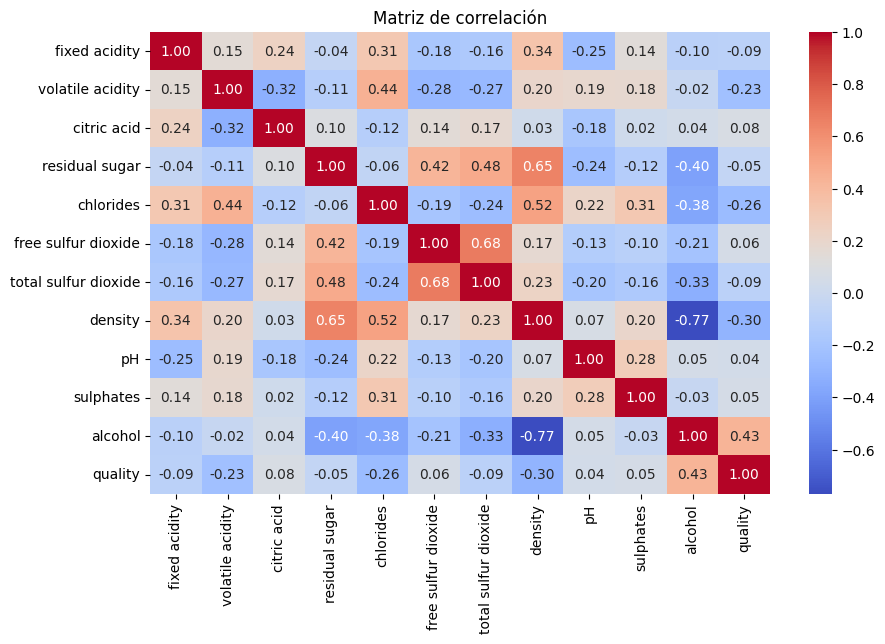

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] < 7.5][feature], label="Baja calidad", shade=True)
C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] >= 7.5][feature], label="Alta calidad", shade=True)


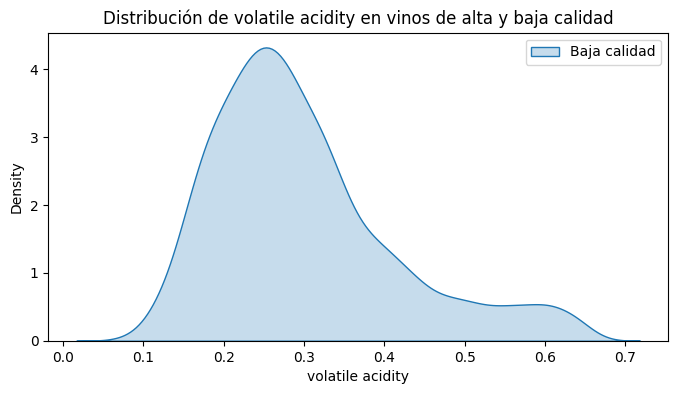

C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] < 7.5][feature], label="Baja calidad", shade=True)
C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] >= 7.5][feature], label="Alta calidad", shade=True)


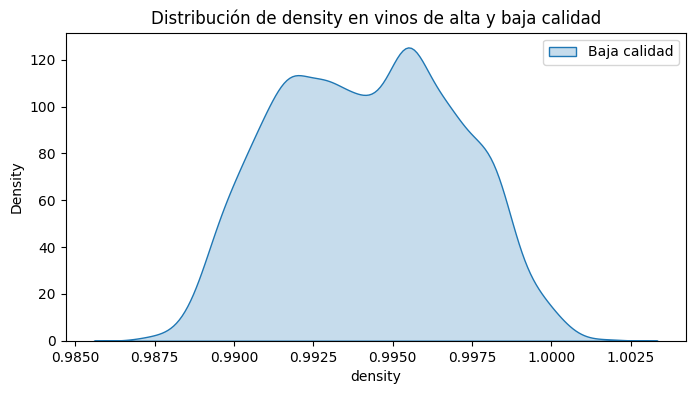

C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] < 7.5][feature], label="Baja calidad", shade=True)
C:\Users\alexc\AppData\Local\Temp\ipykernel_15084\3244879585.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["quality"] >= 7.5][feature], label="Alta calidad", shade=True)


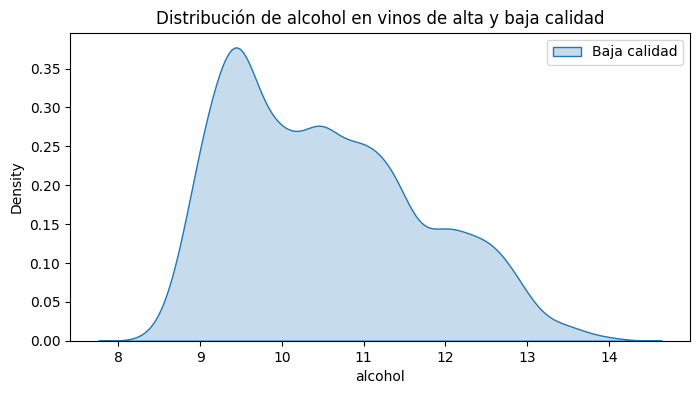

In [90]:
# Gráficos de distribución
features = ['volatile acidity','density','alcohol']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df["quality"] < 7.5][feature], label="Baja calidad", shade=True)
    sns.kdeplot(df[df["quality"] >= 7.5][feature], label="Alta calidad", shade=True)
    plt.title(f"Distribución de {feature} en vinos de alta y baja calidad")
    plt.legend()
    plt.show()


Con esto vemos que:
* A más alcohol, más calidad
* A mayor densidad, menor calidad
* Un volatile acidity alto tendrá más probabilidades de ser un vino de mala calidad.